# Web Scraping with Twitter and Reddit

A workshop for the [Cornell Data Journal](https://www.facebook.com/cornelldatajournal/) // October 15, 2020 // 5-6pm

Hosted by [Melanie Walsh](https://melaniewalsh.org/)

![](Cornell-Data-Journal-Workshop-image.jpg)

This material draws from extensively from my online textbook, [*Introduction to Cultural Analytics & Python*](https://melaniewalsh.github.io/Intro-Cultural-Analytics/welcome.html)

# Why Collect Social Media Data?

- Maybe you're interested in internet language trends, like this [Pudding article about the rise of "lol" on Reddit](https://pudding.cool/2019/10/laugh/#lol)
- Maybe you're interested in Twitter bots, trolls, or online protest movements, like this [NYT article about Twitter bots and Hong Kong protestors](https://www.nytimes.com/interactive/2019/09/18/world/asia/hk-twitter.html) or this [538 article about Russian trolls](https://fivethirtyeight.com/features/why-were-sharing-3-million-russian-troll-tweets/)
- Maybe you're interested in how online communities develop and relate to each other, like this [mapping of subreddits](https://lmcinnes.github.io/subreddit_mapping/subreddit_map.html) or this [538 piece about how people respond to politicians on Twitter](https://fivethirtyeight.com/features/the-worst-tweeter-in-politics-isnt-trump/)

![](Pudding-lols.png)

# How Can We Collect Social Media Data Ethically?

How can we collect social media data ethically — in a way that respects users' privacy, safety, and creative production? This question is not a footnote or an afterthought. This question instead needs to be asked at the very beginning of any project that will collect and analyze social media data — as well as at every subsequent step in the project.

In my [online textbook](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Collection/User-Ethics-Legal-Concerns.html), I discuss that it is generally considered legal to collect publicly available social media data. Just because something is legal does not mean it is ethical, however. Collecting, sharing, and publishing internet data created by or about individuals can lead to unwanted public scrutiny, harm, and other negative consequences for those individuals. For these reasons, some researchers attempt to anonymize internet data before sharing it or before publishing an article that cites a post specifically. Yet anonymizing internet data also does not give credit to internet users as creators and authors.

There is no single, simple answer to the many difficult questions raised by internet data collection. It is important to develop an ethical framework that responds to the specifics of your particular research project or use case (e.g., the platform, the people involved, the context, the potential consequences, etc.).

Below are a few examples of how researchers have approached social media data in published research:

* In Maria Antoniak, David Mimno, and Karen Levy's [article about  a Reddit subcommunity dedicated to birthstories (r/BabyBumps)](https://maria-antoniak.github.io/resources/2019_cscw_birth_stories.pdf), they paraphrased Reddit submissions discussed in the article and then deleted all collected Reddit data after the article was published. 

* In Deen Freelon, Charlton McIlwain, and Meredith D. Clark's [report about the #BlackLivesMatter movement](https://cmsimpact.org/wp-content/uploads/2016/03/beyond_the_hashtags_2016.pdf), they included links to tweets rather than the full text of tweets and only linked to tweets with a minimum of 100 retweets published by Twitter users who had at least 3,000 followers or were verified. They embargoed their Twitter data for a year and then publicly released a list of tweet IDs. Tweet IDs can be used by third-parties to re-download any tweets that have not been deleted yet, as I discuss in the lesson ["Twitter Data Sharing"](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Collection/Twitter-Data-Sharing.html).

* In Moya Bailey's [article about the #GirlsLikeUs hashtag](http://www.digitalhumanities.org/dhq/vol/9/2/000209/000209.html), created by trans advocate Janet Mock, she asked for Mock's permission to work on the project before it began and collaborated with Mock to develop research questions and determine the project's direction.

# How Can We Collect Social Media Data With Computational Tools?

## APIs vs Web Scraping

An Application Programming Interface (API) allows you to programmatically extract and interact with data under the hood of websites, social networks, and other projects that make their data publicly available. Twitter and Reddit both offer APIs that allow users to access their data. However, because these APIs are controlled by the companies themselves, they also come with limitations. For example, Twitter does not allow users to collect tweets more than one week in the past without a paid subscription.

Another way that you might collect data from the internet or social media is via web scraping. When you get data from an API, you're getting data from an internal source (from "inside" Twitter). When you "scrape" the surface of a web page, you're getting data from the user-facing surface of a web page, just like the web page you would pull up if you opened Chrome and typed "twitter.com". This makes web scraping sometimes clunky and unreliable when compared to an API, although it's often the only option if there's not an available API or the API does not offer what you're looking for.

## Reddit

Though Reddit has its own API, there is a more popular API for working with Reddit called Pushshift. You can read more about Pushshift in this arXiv article: https://arxiv.org/abs/2001.08435 ([PDF](https://arxiv.org/pdf/2001.08435.pdf))

> Why do people use Pushshift’s API instead of the official Reddit API?

> In short, Pushshift makes it
much easier for researchers to query and retrieve historical
Reddit data, provides extended functionality by providing fulltext search against comments and submissions, and has larger
single query limits. 

>— Jason Baumgartner, et al., ["The Pushshift Reddit Dataset"](https://arxiv.org/pdf/2001.08435.pdf)

### Install PSAW

To work with the Pushshift API, we're going to install and use a Python wrapper called [PSAW](https://github.com/dmarx/psaw).

In [ ]:
!pip install psaw

Import Pandas and set display options

In [1]:
import pandas as pd
pd.set_option('max_colwidth', 500)
pd.set_option('max_columns', 50)

Import PushshiftAPI

In [2]:
from psaw import PushshiftAPI

Initialize PushshiftAPI

In [ ]:
api = PushshiftAPI()

## PSAW Usage

To collect Reddit posts:

`api_request_generator = api.search_submissions(subreddit="subrredit of interest", score=">certain upvote score", q="search keyword", before=date, after=date`)

`reddit_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])`

To collect Reddit comments:

`api_request_generator = api.search_comments(subreddit="subrredit of interest", score=">certain upvote score", q="search keyword", before=date, after=date`)

`reddit_comments = pd.DataFrame([comment.d_ for comment in api_request_generator])`

## Collect Reddit submissions for a subreddit (with more than a certain upvote score)

Set up generator to make API request

In [4]:
api_request_generator = api.search_submissions(subreddit='AmITheAsshole', score = ">2000")

Grab data for each Reddit submission and make into a DataFrame

In [5]:
aita_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

/Users/melaniewalsh/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:192: UserWarning: Got non 200 code 429
  warnings.warn("Got non 200 code %s" % response.status_code)
/Users/melaniewalsh/opt/anaconda3/lib/python3.7/site-packages/psaw/PushshiftAPI.py:180: UserWarning: Unable to connect to pushshift.io. Retrying after backoff.
  warnings.warn("Unable to connect to pushshift.io. Retrying after backoff.")


Check how many Reddit posts have been collected:

In [6]:
aita_submissions.shape

(2959, 78)

Check what columns/metdata exist in this data:

In [7]:
aita_submissions.columns

Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'edited', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'retrieved_on', 'score', 'selftext', 'send_replies', 'spoiler',
       'stickied', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
       'subreddit_type', 'suggested_sort', 'thumbnail', 'title',
       'total_awards_received', 'trea

In [8]:
aita_submissions[['title', 'score']].sample(10)

,title,score
2002,AITA for cooking my Muslim date non halal meal after he said he doesn’t eat halal? my friends think I’m a major ass.,14669
2513,AITA for thinking my girlfriend sleeping with her dad is inappropriate?,7864
1098,AITA for keeping my father's love child a secret?,9130
880,AITA for wanting to work out when I get home from work?,3785
2706,"AITA for telling a girl that she’s not “just being honest”, she’s just being a bitch?",16531
1999,AITA for showing up at my cousin's wedding in a hoodie and jean shorts?,17238
2624,AITAH for pressing charges against my pregnant best friend?,3420
2319,WIBTA for getting an annulment after my wife told me about her previous history of abuse the day after we married?,5623
99,AITA For snapping at my husband this morning because he makes fun of my weight.,6997
1212,AITA for not letting my sister and her baby live with me?,4628


Select columns of interest

In [12]:
aita_submissions[['author', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

,author,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,stolen-ideas,WIBTA if I sue my SIL for stealing my book and making a huge profit from it?,"I (24f) write as a hobby, and I like sharing my short stories with my small following. I do want to publish one day, but I want to make it perfect first since it's not edited yet.\n\nThe unfinished book we're talking about came from an idea that I started to build when I was in middle school. I just finished it last year, but because of the virus, I was forced to put that project aside to ensure steady employment with my day job.\n\nMy brother and SIL came to visit me to introduce their baby...",https://www.reddit.com/r/AmItheAsshole/comments/is9p55/wibta_if_i_sue_my_sil_for_stealing_my_book_and/,AmItheAsshole,2128,1176,2
1,Current_Task9048,AITA for ignoring SIL's apology for a prank gone wrong?,"My MIL is not allowed to be alone with my son for a variety of reasons. She is very unstable and manipulative. SIL (not daughter, also married in) does not have the same experience at all and adores MIL. I know SIL thinks i am being over dramatic, but she had never undermined me before.\n\nThe other day i got a text from SIL saying that my husband had dropped off our son with MIL. I immediately panicked and contacted my husband but he wasn't picking up (he was actually at his dad's house and...",https://www.reddit.com/r/AmItheAsshole/comments/is92vb/aita_for_ignoring_sils_apology_for_a_prank_gone/,AmItheAsshole,2012,1305,0
2,TheJellyTypewriter,"WIBTA for hiding a family heirloom, so my dad can't give it to his fiance?","My great-grandmother was an exceptional embroiderer. She would cover massive canvasses. She never taught me,( I taught myself later in life) but I loved seeing her work when we went to her house. She died when I was 14. A few years ago, my grandmother gave our family one of her final pieces for Christmas, it's been hanging in the stairway ever since. \n\nLast year my father started dating this horribly toxic woman, who in 6 months had destroyed my dad's relationships with all his children, ...",https://www.reddit.com/r/AmItheAsshole/comments/is6yg8/wibta_for_hiding_a_family_heirloom_so_my_dad_cant/,AmItheAsshole,5028,1184,0
3,Throwawayolderbro534,AITA for cutting my elderly parents off financially after they kicked out my gay brother?,"Throwaway because a lot of my friends use Reddit.\n\nI’m a 24 year old software engineer originally from an Arab Muslim country. I moved to the United States with my parents when I was five years old, and my younger brother was born here. He is now 16.\n\nA year ago, my brother came out to me as gay. It wasn’t a surprise to me, I’ve always been very close to my brother. We grew up in a majority white town and my brother was picked on frequently as a kid for being Arab, and on top of that he’...",https://www.reddit.com/r/AmItheAsshole/comments/is55v4/aita_for_cutting_my_elderly_parents_off/,AmItheAsshole,21816,3599,2
4,coffeebobbie,AITA for fencing my property,"When my grandmother passed about 10 years ago my family began to use her home as a vacation home. We've spent the last decade improving the property, which is about twice as big as the neighboring ones because plots were cheaper 50 years ago when my grandmother purchased it. We have a 1/4 acre wooded backyard that has never been fenced. The neighbors have built a porch up to their property line that overlooks our backyard, and spend quite a bit of time out there. They have been throwing r...",https://www.reddit.com/r/AmItheAsshole/comments/is2b8p/aita_for_fencing_my_property/,AmItheAsshole,2186,618,0
...,...,...,...,...,...,...,...,...
2954,BackgroundJellyfish,AITA for hitting my girlfriend out of reflex for her scaring me?,"Hi, so my girlfriend and i watched a horror movie recently, called The Last Exorcism. Now keep in mind, i HATE horror, i get very scared easily. but she likes horror, and practically begged me to watch it with her. So, i did watch it, and have been v

Output to CSV file

In [14]:
aita_submissions[['author', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']].to_csv("top_aita_submissions.csv", encoding='utf-8', index=False)

## Collect Reddit submissions based on search keyword (with more than a certain upvote score)

Set up generator to make API request

In [15]:
api_request_generator = api.search_submissions(q='Cornell', score = ">2000")

Grab data for each Reddit submission and make into a DataFrame

In [16]:
cornell_submissions = pd.DataFrame([submission.d_ for submission in api_request_generator])

In [17]:
cornell_submissions.shape

(112, 83)

In [18]:
cornell_submissions[['author', 'title', 'selftext', 'url', 'subreddit', 'score', 'num_comments', 'num_crossposts']]

,author,title,selftext,url,subreddit,score,num_comments,num_crossposts
0,the_light_of_dawn,"Reggie's Lecture At Cornell: Reggie Calls Wii U A ""Failure Forward"" Because It Led To Switch",,https://www.resetera.com/threads/reggies-lecture-at-cornell-the-thread.148387/#post-25675346,NintendoSwitch,3410,363,0.0
1,evaee00,Can you please not apply to Cornell? My son wants to apply there too!,"So this is a story that happened to my friend this year and I am honestly so shocked by this.\n\nSo basically my friend is a regular good student at school, has amazing after school activities, and is student government president. She also has a perfect SAT score.\n\nIt has been my friends dream to go to Cornell. Both her parents went and she has been in love with it for years.\n\nNow enter entitled mom and entitled son.\n\nMy friend’s mother gets a call on her mobile from the entitled mom.\...",https://www.reddit.com/r/entitledparents/comments/de5ngd/can_you_please_not_apply_to_cornell_my_son_wants/,entitledparents,11375,241,0.0
2,MistWeaver80,New research from Cornell University shows that plants can communicate with each other when they come under attack from pests. Plants share messages in the form of airborne chemicals known as volatile organic compounds (VOCs) that transfer information among plants.,,https://www.cell.com/current-biology/fulltext/S0960-9822(19)31027-9?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0960982219310279%3Fshowall%3Dtrue,science,3651,237,0.0
3,BoomWhatWhat,"Cornell will eliminate medical school debt for all students who qualify for financial aid, starting this fall",,https://www.cnn.com/2019/09/17/us/cornell-scholarship-financial-aid-trnd/index.html,news,44406,2220,0.0
4,SirCSquared,I took this photo at the last Soundgarden concert. Chris Cornell took his life that night.,,https://i.redd.it/op394mbhgkd31.jpg,lastimages,4759,185,0.0
...,...,...,...,...,...,...,...,...
107,vinitmodi7,Found This at Cornell Campus,,http://i.imgur.com/8o7l3rs.jpg,funny,2442,178,NaN
108,CUAskAnAstronomer,We are Cornell University's Ask An Astronomer Team. Ask Us Anything!,"Hi Reddit!\n\nWe are the Ask an Astronomer Team at Cornell University. We are a team of graduate students within the Department of Astronomy that volunteers time to answer questions from the public, both online and in various events hosted throughout the city of Ithaca, NY. Our [website](http://curious.astro.cornell.edu) describes what we do and how to contact us.\n\nWhenever a popular article is posted about astronomy on Reddit, we notice that a lot of questions float around typically. A fe...",http://www.reddit.com/r/IAmA/comments/1iuc2i/we_are_cornell_universitys_ask_an_astronomer_team/,IAmA,2010,1168,NaN
109,ChrisCornellSG,"Hey Reddit, I'm Chris Cornell from Soundgarden. AMA in 45 min!",Soundgarden will be on tour this May: [tour info](http://soundgardenworld.com/second-leg-of-us-tour/) \n \nAnd we put out our first album in over 15 years last November: [King Animal](http://en.wikipedia.org/wiki/King_Animal) \n \n[Twitter Proof 1] (https://twitter.com/soundgarden/status/321342408791044096) \n[Twitter Proof 2] (https://twitter.com/chriscornell/status/321341541685813248) \n \nThanks everyone! That was great! See you out at the shows.,http://www.reddit.com/r/IAmA/comments/1bxp4f/hey_reddit_im_chris_cornell_from_soundgarden_ama/,IAmA,2264,2562,NaN
110,pendulumlover,Found this on a water fountain at Cornell...,,http://i.imgur.com/XA3Pbl2.jpg,funny,2121,257,NaN


Where are the popular "Cornell" Reddit posts appearing?

In [19]:
cornell_submissions['subreddit'].value_counts()

science                 22
IAmA                    11
The_Donald               7
todayilearned            7
Music                    5
news                     4
SandersForPresident      3
videos                   3
askscience               3
politics                 2
movies                   2
funny                    2
lastimages               2
InternetIsBeautiful      2
Showerthoughts           2
OldSchoolCool            2
unpopularopinion         1
coolguides               1
relationships            1
conspiracy               1
Damnthatsinteresting     1
DunderMifflin            1
westworld                1
TwoXChromosomes          1
AskHistorians            1
tattoos                  1
Metal                    1
AdviceAnimals            1
Guitar                   1
interestingasfuck        1
offmychest               1
lego                     1
uncensorednews           1
HistoryPorn              1
entitledparents          1
LadyBoners               1
EarthPorn                1
C

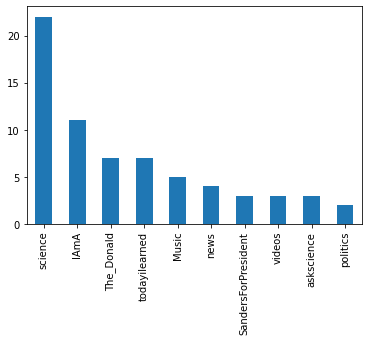

In [20]:
cornell_submissions['subreddit'].value_counts()[:10].plot(kind='bar')

## Twitter

We're going to collect Twitter data with the Python/command line tool [twarc](https://github.com/DocNow/twarc). This tool was developed by a project called [Documenting the Now](https://www.docnow.io/). The DocNow team develops tools and ethical frameworks for social media research.

In [ ]:
!pip install twarc

## Twitter API Keys

Because twarc relies on Twitter's API, we need to apply for a Twitter developer account and create a Twitter application before we use it. You can find instructions for the application process and for installing and configuring twarc here: [Twitter Collection Setup](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Collecting-Cultural-Data/Twitter-Collection-Setup.html).

You can configure twarc by running `twarc conifgure` on the command line, or you can type your Twitter handle (without the @ symbol) and [API keys](https://developer.twitter.com/en/apps) into the quotation marks below and run the cell.


🚨 Skip running this cell if you've already configured twarc!! 🚨

In [10]:
#Insert Your Twitter API Info here

twitter_handle = ""
consumer_key= ""
consumer_secret = ""
access_token = ""
access_token_secret= ""

#The Code That Will Configure Twarc
configuration = f"""[{twitter_handle}]
consumer_key={consumer_key}
consumer_secret = {consumer_secret}
access_token = {access_token}
access_token_secret= {access_token_secret}
"""

import os
config_filename = os.path.join(os.path.expanduser("~"), ".twarc")
with open(config_filename, "w") as file_object:
    file_object.write(configuration)

### Collect Tweets From Past 7 days

With the free version of the Twitter API, there are basically two ways to collect your own Twitter data: in real time or ~7 days in the past. To get data any further in the past requires a paid version of the Twitter API. We're going to demonstrate how to collect Twitter data from the past ~7 days, but you can explore the other functionalities of Twarc by reading through [the documentation](https://github.com/DocNow/twarc).

## Usage

`twarc search "cornell" > cornell_search.jsonl` 

To collect tweets from approximately 7 days in the past, you can use the command `twarc search`, followed by a search query, then the output operator `>` and a filename of your choosing with the ".jsonl" file extension (which outputs your Twitter data to this JSONL file).

Search for tweets that mention "cornell" but only from verified accounts

In [22]:
!twarc search "cornell filter:verified" > cornell_search.jsonl

How many tweets were collected?

 Mac/Chrome OS

In [23]:
!wc -l cornell_search.jsonl

     804 cornell_search.jsonl


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Windows_logo_-_2012_derivative.svg/1024px-Windows_logo_-_2012_derivative.svg.png width=20 align='left' > Windows 

In [ ]:
!find /v /c "" cornell_search.jsonl

If you download [Twarc utilities](https://github.com/DocNow/twarc#utilities), you can easily transform a Twitter jsonl file into a CSV file:

In [24]:
!python twarc/utils/json2csv.py cornell_search.jsonl > cornell_search.csv

What columns or metadata categories are available in this data?

In [25]:
cornell_tweet_df = pd.read_csv("cornell_search.csv")
cornell_tweet_df.columns

Index(['id', 'tweet_url', 'created_at', 'parsed_created_at',
       'user_screen_name', 'text', 'tweet_type', 'coordinates', 'hashtags',
       'media', 'urls', 'favorite_count', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_favourites_count', 'user_followers_count',
       'user_friends_count', 'user_listed_count', 'user_location', 'user_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

Look at random sample of tweets

In [26]:
cornell_tweet_df[['user_screen_name', 'text', 'retweet_count']].sample(10)

,user_screen_name,text,retweet_count
134,CornellNews,New and extremely sensitive instruments are allowing scientists to use a novel source of information – gravitational waves – to understand fundamental principles of nature. https://t.co/C0yKh9Hca7,6
117,NeWNetwork,"Tonight, NeW at @Cornell University is partnering with other groups on campus to host a debate featuring @LisaDaftari. https://t.co/WrhZNupGVO",0
207,GEResearch,"""Heart-felt"" news! Proud to partner with @rpi, @Cornell and Cleerly Health on an @NIH project, applying #artificialintelligence tech to improve cardiac CT diagnosis. @GEHealthcare @generalelectric \nhttps://t.co/o7oRfqyC7b",3
585,wellreadblkgirl,"TODAY: Noted authors, scholars and poets will celebrate Toni Morrison, M.A. ’55, with a livestreamed community reading of her first novel “The Bluest Eye,” on the 50th anniversary of its release. @CornellCAS\nhttps://t.co/rPlh6tnX0o",38
459,CornellAlumni,"In her fourth State of the University Address, @Cornell President Martha E. Pollack announced that two residence halls will be named for Justice Ruth Bader Ginsburg ’54 and Nobel Prize-winning author Toni Morrison, M.A. ’55. @CornellAlumni #RBG #equity https://t.co/efzUQcJ1yV",13
579,cornellsun,Last week’s Student Assembly election drew a historically low voter turnout — less than a fifth of Cornell students casted their ballots.\nhttps://t.co/deyRRjqWgd,0
162,ADsXe,Chris Cornell Talks to A.D. Rowntree https://t.co/hunb5ICRqo,0
158,detikcom,"Peneliti dari Cornell University telah menciptakan teknologi baru di mana sistem earphone yang dapat mengetahui ekspresi wajah penggunanya meski pakai masker. Teknologi tersebut dinamai C-Face, bagaimana cara kerjanya? \n\nvia @detikinet https://t.co/xnxiT2BU0l",3
47,MikeABCColumbia,"I love stories like this man.\n\nGamecock RB Kevin Harris was a three-star RB... had offers from Air Force, Army, Cornell, Elon, Furman, Mercer, MTSU, Navy, The Citadel, Tulane, and Wofford.\n\nNow... he's second in the SEC in rushing, behind only Alabama's Najee Harris.",100
21,Paul_Cornell,A lot of science folks are posting some superb spider photos for #Arachtober so I thought I'd resurrect a few of my rather less scientific sketches. Maybe next year 31 spiders and their handlers... https://t.co/eU41F0Y3Op,12


Look at most retweeted tweets

In [27]:
cornell_tweet_df[['user_screen_name', 'text', 'retweet_count']].sort_values(by='retweet_count', ascending=False)

,user_screen_name,text,retweet_count
777,AskMrMickey,"Dr. Fauci at a Cornell event: ""The potential for what COVID can do ... is very, very much different from influenza. You don't get a pandemic that kills a million people and it isn't even over yet within influenza. So it is not correct to say it's the same as flu.""",1097
700,dasoulassassin,#GatesFoundation awarded $10 million to Cornell Alliance for Science. Investment comes when foundation under fire for spending billions on ag development schemes that critics say are entrenching farming methods that benefit corporations over people. \n\nhttps://t.co/lzlZGUeQMG,467
754,RobertKennedyJr,#GatesFoundation awarded $10 million to Cornell Alliance for Science. Investment comes when foundation under fire for spending billions on ag development schemes that critics say are entrenching farming methods that benefit corporations over people. \n\nhttps://t.co/lzlZGUeQMG,467
338,JamesPMorrison,"President* Trump has been the single largest driver of misinformation about the COVID19 pandemic, a Cornell research study finds.\n\nIs Trump the biggest COVID19 #SuperSpreader on planet earth?\n\n@StandForBetter https://t.co/fnVoXSSsDO https://t.co/TFWS6YmArP https://t.co/Oquj9eTY9D",396
183,tanita_tikaram,"President* Trump has been the single largest driver of misinformation about the COVID19 pandemic, a Cornell research study finds.\n\nIs Trump the biggest COVID19 #SuperSpreader on planet earth?\n\n@StandForBetter https://t.co/fnVoXSSsDO https://t.co/TFWS6YmArP https://t.co/Oquj9eTY9D",396
...,...,...,...
551,cornellsun,"The newly updated site includes an interactive synopsis of 2020’s sustainability accomplishments, including Cornell’s carbon neutrality progress, education and engagement.\nhttps://t.co/BJ1MFVB1Z3",0
550,Manning4USCong,@small4lyfe @Ilhan Show me where in the 14th amendment the right to privacy is discussed. \nhttps://t.co/EELxavghCC\nNot even RBG bought this justification.,0
191,jrburns,@DaveOBrienCT I worked with a couple who went to Cornell. Cornell College in Iowa.,0
548,Paul_Cornell,"@marryshelleyy I’d best not read it, in case some of the concepts are similar. Which is probably me being overtly worried about legal stuff, and is frustrating, because I love encouraging new takes. Put it online and I’ll promote it without looking!",0


Output to CSV

In [ ]:
cornell_tweet_df.to_csv('cornell_tweets.csv', index=False, encoding='utf-8')

## Twitter Data Sharing

Twitter discourages developers and researchers from sharing full Twitter data openly on the web. They instead encourage developers and researchers to share *tweet IDs*:

> [If you provide Twitter Content to third parties, including downloadable datasets or via an API, you may only distribute **Tweet IDs**, Direct Message IDs, and/or User IDs.](https://developer.twitter.com/en/developer-terms/policy#4-e)

Tweet IDs are unique identifiers assigned to every tweet. They look like a random string of numbers: 1189206626135355397. Each tweet ID can be used to download the full data associated with that tweet (if the tweet still exists). This is a process called "hydration."

<img src="https://cdn.pixabay.com/photo/2013/07/12/19/24/sapling-154734_960_720.png" width=100% >

**Hydration: a young tweet ID sprouts into a full tweet (to be read in David Attenborough's voice)**

You can read more about Twitter data sharing in my [online textbook](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Data-Collection/Twitter-Data-Sharing.html).

# Resources

- [Pushshift](https://github.com/pushshift/api)
    - [Pushshift arXiv paper PDF](https://arxiv.org/pdf/2001.08435.pdf)
- [PSAW](https://github.com/dmarx/psaw)
- [Twarc](https://github.com/DocNow/twarc)
- [Twitter API documentation](https://developer.twitter.com/en/docs/twitter-api/getting-started/guide)

# Recommended Reading: Social Media Data Ethics

* [Doc Now White Paper](https://www.docnow.io/docs/docnow-whitepaper-2018.pdf), Bergis Jules, Ed Summers, Dr. Vernon Mitchell, Jr.
* <a href="https://cmci.colorado.edu/~cafi5706/ICWSM2020_datascraping.pdf">No Robots, Spiders, or Scrapers: Legal and Ethical Regulation of Data Collection Methods in Social Media Terms of Service</a>, Casey Fiesler, Nathan Beard, Brian C. Keegan
* [#transform(ing)DH Writing and Research: An Autoethnography of Digital Humanities and Feminist Ethics](http://www.digitalhumanities.org/dhq/vol/9/2/000209/000209.html), Moya Bailey
* [The #TwitterEthics Manifesto](https://modelviewculture.com/pieces/the-twitterethics-manifesto), Dorothy Kim and Eunsong Kim